# Name: Mahathi Veluri - GRIP Task 1 - Exploratory Data Analysis Retail.

In [45]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Read the file
file = os.path.join("Resources","SampleSuperstore.csv")
file

'Resources\\SampleSuperstore.csv'

In [47]:
#store the file to dataframe
retail_data = pd.read_csv(file)
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [48]:
# Filling values with '0's
retaildata = retail_data.fillna(0)
retaildata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


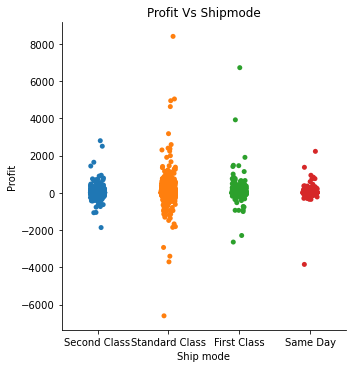

In [49]:
# Shipmode VS Profit

sns.catplot(x="Ship Mode",y="Profit",data=retaildata)
plt.xlabel("Ship mode")

plt.title('Profit Vs Shipmode')
plt.savefig('Images/shipmode_cat.png')

In [50]:
ship_profit = retaildata[['Ship Mode','Profit']]
ship_profit_grp = ship_profit.groupby('Ship Mode').Profit.sum()
s_p = ship_profit_grp.reset_index()
s_p

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


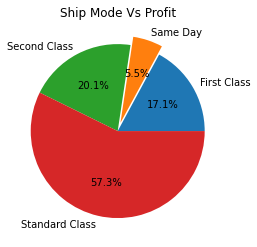

In [51]:
plt.pie(s_p['Profit'],labels=s_p['Ship Mode'],autopct='%1.1f%%',explode=(0,0.1,0,0))
plt.title('Ship Mode Vs Profit')
plt.savefig('Images/Ship Mode pie.png')

In [52]:
print("The total profit for 'Same day' ship mode is significantly very less which needs a major focus and then in the 'first class' and 'second class' ship modes")

The total profit for 'Same day' ship mode is significantly very less which needs a major focus and then in the 'first class' and 'second class' ship modes


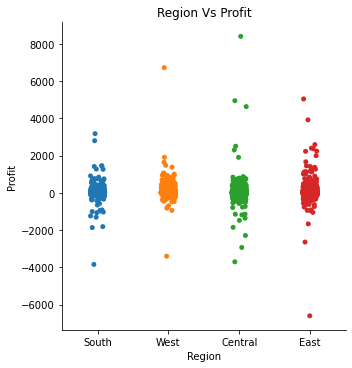

In [53]:
# Region VS Profit

sns.catplot(x="Region",y="Profit",data=retaildata)
plt.xlabel("Region")

plt.title('Region Vs Profit')
plt.savefig('Images/region_cat.png')

In [54]:
reg_pro = retaildata[['Region','Profit']]
r_p_grp = reg_pro.groupby('Region').Profit.sum()
r_p = r_p_grp.reset_index()
r_p

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


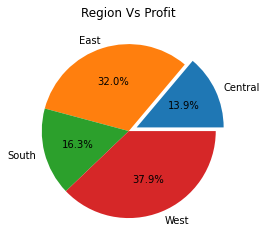

In [55]:
plt.pie(r_p['Profit'],labels=r_p['Region'],autopct='%1.1f%%',explode=(0.1,0,0,0))
plt.title('Region Vs Profit')
plt.savefig('Images/Region pie.png')

In [56]:
print("The central ans south regions are weaker areas and have very less profit percentage ")

The central ans south regions are weaker areas and have very less profit percentage 


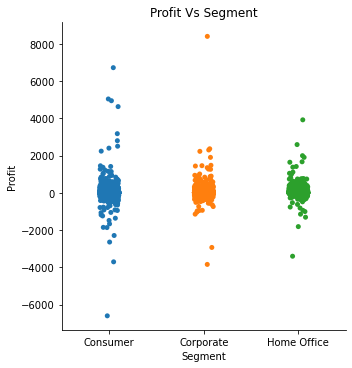

In [57]:
# Segment VS Profit

sns.catplot(x="Segment",y="Profit",data=retaildata)
plt.xlabel("Segment")

plt.title('Profit Vs Segment')
plt.savefig('Images/Segment_cat.png')

In [58]:
# Segment VS Profit
seg_pro=retaildata[['Segment','Profit']]
seg_pro_grp = seg_pro.groupby('Segment').sum()
seg_pro_rst = seg_pro_grp.reset_index()
seg_pro_rst

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


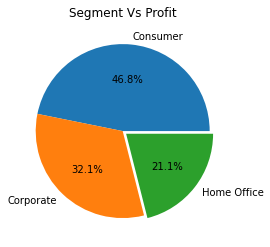

In [59]:
plt.pie(seg_pro_rst['Profit'],labels=seg_pro_rst['Segment'],autopct='%1.1f%%',explode=(0,0,0.05))
plt.title('Segment Vs Profit')
plt.savefig('Images/segment pie.png')

In [60]:
print('The home office segment is a weaker area in terms of profit.')

The home office segment is a weaker area in terms of profit.


In [61]:
cat = retaildata.groupby(['Category','Sub-Category']).Profit.sum()
cat_df = pd.DataFrame(cat)
cat_df

Profit
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Chairs        26590.1663
                Furnishings   13059.1436
                Tables       -17725.4811
Office Supplies Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Envelopes      6964.1767
                Fasteners       949.5182
                Labels         5546.2540
                Paper         34053.5693
                Storage       21278.8264
                Supplies      -1189.0995
Technology      Accessories   41936.6357
                Copiers       55617.8249
                Machines       3384.7569
                Phones        44515.7306

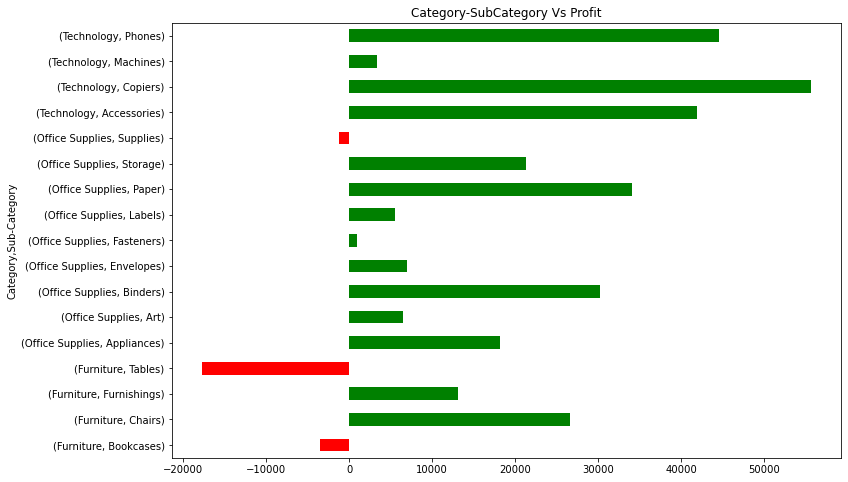

In [62]:
cat_df['positive'] = cat_df['Profit'] > 0
cat_df['Profit'].plot.barh(figsize=(12,8),color=cat_df.positive.map({True: 'g', False: 'r'}))
plt.title('Category-SubCategory Vs Profit')
plt.savefig('Images/cat_subcat.png')

In [63]:
print("The tables and bookcases in furniture category, supplies in office supplies are in losses . Fasteners in office supplies have very low profits.")

The tables and bookcases in furniture category, supplies in office supplies are in losses . Fasteners in office supplies have very low profits.


In [64]:
state = retaildata.groupby(['State']).Profit.sum()
state_df = pd.DataFrame(state)
len(state_df)
state_df.head()

,Profit
State,
Alabama,5786.8253
Arizona,-3427.9246
Arkansas,4008.6871
California,76381.3871
Colorado,-6527.8579


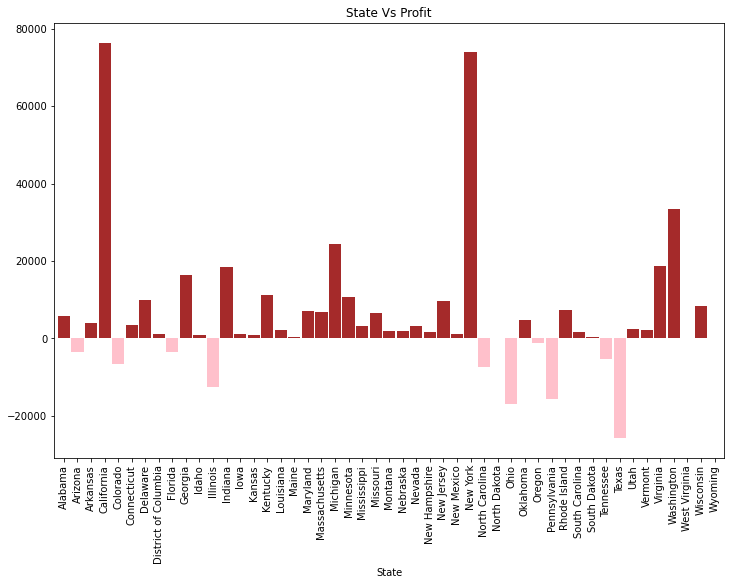

In [65]:
state_df['positive'] = state_df['Profit'] > 0
state_df['Profit'].plot.bar(figsize=(12,8),width=0.9,color=state_df.positive.map({True:'brown',False:'pink'}))
plt.title('State Vs Profit')
plt.savefig('Images/State_profit.png')

In [66]:
print("States - Arizona , Colarado , Florida , Illinois , North Carolina , Ohio , Oregon , Pennsylvania , Tennessee , Texas are in major losses")

States - Arizona , Colarado , Florida , Illinois , North Carolina , Ohio , Oregon , Pennsylvania , Tennessee , Texas are in major losses


In [67]:
print("States - District of Columbia , Idaho , Iowa , Kansas , Maine , Newhampshire , New Mexico , South Dakota , West virginia , Wyoming have very low profits")

States - District of Columbia , Idaho , Iowa , Kansas , Maine , Newhampshire , New Mexico , South Dakota , West virginia , Wyoming have very low profits


In [68]:
city = retaildata[["City","Postal Code","Profit"]]
city.head()

,City,Postal Code,Profit
0,Henderson,42420,41.9136
1,Henderson,42420,219.5820
2,Los Angeles,90036,6.8714
3,Fort Lauderdale,33311,-383.0310
4,Fort Lauderdale,33311,2.5164


In [69]:
city = city.groupby(['City','Postal Code']).Profit.sum()
city_df = pd.DataFrame(city)

In [70]:
city_df.head()

,,Profit
City,Postal Code,
Aberdeen,57401,6.6300
Abilene,79605,-3.7584
Akron,44312,-186.6356
Albuquerque,87105,634.0881
Alexandria,22304,318.6183


In [71]:
city_reset = city_df.reset_index()
city_reset['city_postal'] = ''

In [72]:
for i in range(len(city_reset)):
    city_reset['city_postal'][i] = city_reset['City'][i] + "," + str(city_reset['Postal Code'][i])

<ipython-input-72-e60093432416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_reset['city_postal'][i] = city_reset['City'][i] + "," + str(city_reset['Postal Code'][i])


In [73]:
cities_top_15 = city_reset.sort_values(by='Profit',ascending=False)
top_15 = cities_top_15.head(15)
top_15

,City,Postal Code,Profit,city_postal
398,New York City,10024,21653.7248,"New York City,10024"
399,New York City,10035,16533.8669,"New York City,10035"
396,New York City,10009,13697.0019,"New York City,10009"
545,Seattle,98115,13303.8755,"Seattle,98115"
397,New York City,10011,10152.3901,"New York City,10011"
280,Lafayette,47905,8976.0973,"Lafayette,47905"
544,Seattle,98105,8734.6042,"Seattle,98105"
400,Newark,19711,8086.1715,"Newark,19711"
147,Detroit,48205,7994.5263,"Detroit,48205"
326,Los Angeles,90049,7793.1145,"Los Angeles,90049"


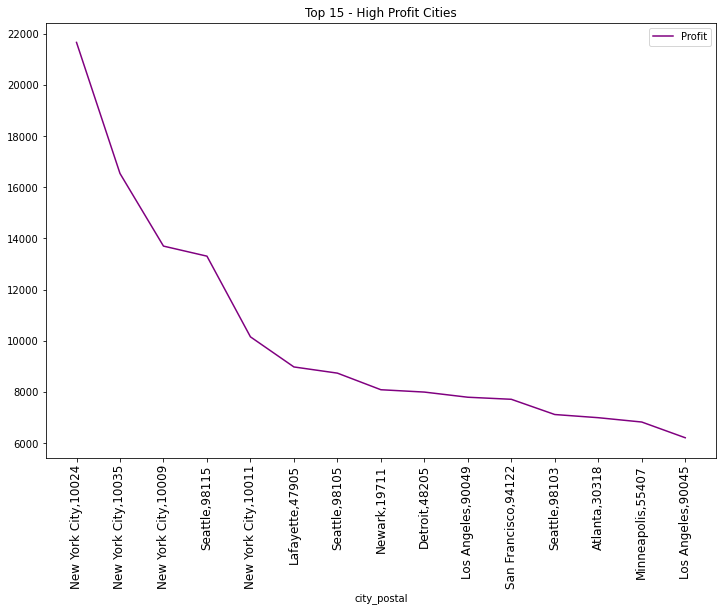

In [74]:
t1 = list(top_15['city_postal'])
top_15.plot(x='city_postal',y='Profit',kind="line",color='purple',figsize=(12,8))
plt.xticks(list(range(len(t1))),t1,fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 15 - High Profit Cities')
plt.savefig('Images/top_15.png')

In [75]:
print("These are the 15 highest profit cities with major profits.")

These are the 15 highest profit cities with major profits.


In [76]:
cities_btm_15 = city_reset.sort_values(by='Profit')
btm_15 = cities_btm_15.head(15)
btm_15

,City,Postal Code,Profit,city_postal
521,San Antonio,78207,-7299.0502,"San Antonio,78207"
292,Lancaster,43130,-7149.6180,"Lancaster,43130"
69,Burlington,27217,-5894.5269,"Burlington,27217"
92,Chicago,60653,-5678.7982,"Chicago,60653"
451,Philadelphia,19140,-5168.3905,"Philadelphia,19140"
248,Houston,77095,-4447.3323,"Houston,77095"
452,Philadelphia,19143,-3830.7458,"Philadelphia,19143"
450,Philadelphia,19134,-3745.8552,"Philadelphia,19134"
328,Louisville,80027,-3406.2095,"Louisville,80027"
453,Phoenix,85023,-2790.8832,"Phoenix,85023"


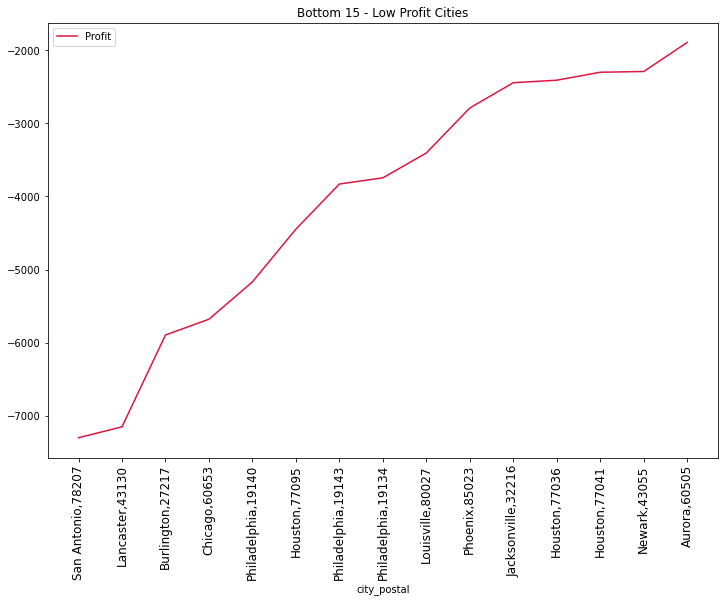

In [77]:
l1 = list(btm_15['city_postal'])
btm_15.plot(x='city_postal',y='Profit',kind="line",color="crimson",figsize=(12,8))
plt.xticks(list(range(len(l1))), l1, fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.title('Bottom 15 - Low Profit Cities')
plt.savefig('Images/Bottom_15.png')

In [78]:
print("These are the 15 lowset profit cities with major lossess.")

These are the 15 lowset profit cities with major lossess.


In [79]:
sales_profit = retaildata[['State','Sales','Profit']]
#sales_profit

In [80]:
state_sales_profit = sales_profit.groupby('State').sum()

In [81]:
state_sales_profit_df = state_sales_profit.reset_index()
state_sales_profit_df.head()

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


In [82]:
state_sales_profit_df['state_sales']=''

In [83]:
for i in range(len(state_sales_profit_df)):
    state_sales_profit_df['state_sales'][i] = state_sales_profit_df['State'][i] +"," + " " + str(state_sales_profit_df['Sales'][i])

<ipython-input-83-22520cf47ca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sales_profit_df['state_sales'][i] = state_sales_profit_df['State'][i] +"," + " " + str(state_sales_profit_df['Sales'][i])


In [84]:
state_sales_profit_df.head(10)

,State,Sales,Profit,state_sales
0,Alabama,19510.6400,5786.8253,"Alabama, 19510.639999999992"
1,Arizona,35282.0010,-3427.9246,"Arizona, 35282.001"
2,Arkansas,11678.1300,4008.6871,"Arkansas, 11678.129999999997"
3,California,457687.6315,76381.3871,"California, 457687.631500001"
4,Colorado,32108.1180,-6527.8579,"Colorado, 32108.118"
5,Connecticut,13384.3570,3511.4918,"Connecticut, 13384.356999999996"
6,Delaware,27451.0690,9977.3748,"Delaware, 27451.068999999992"
7,District of Columbia,2865.0200,1059.5893,"District of Columbia, 2865.0199999999995"
8,Florida,89473.7080,-3399.3017,"Florida, 89473.708"
9,Georgia,49095.8400,16250.0433,"Georgia, 49095.840000000004"


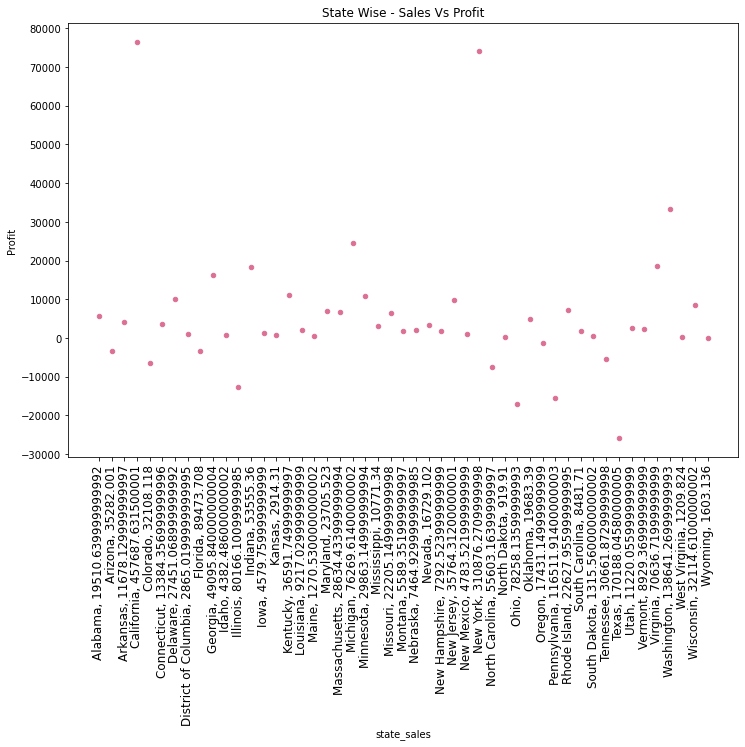

In [85]:
state_sales_profit_df.plot(x="state_sales",y="Profit",kind="scatter",color="palevioletred",figsize=(12,8))

y1=state_sales_profit_df['Profit'].max()
plt.yticks(np.arange(-30000,y1+10000,10000))

plt.xticks(rotation=90,fontsize=12)

plt.title("State Wise - Sales Vs Profit")
plt.savefig('Images/state_wise_sales_profit.png')

In [86]:
print("The plot shows the sales vs profit for all states")

The plot shows the sales vs profit for all states


In [87]:
print("States - Arizona , Colarado , Florida , Illinois , North Carolina , Ohio , Oregon , Pennsylvania , Tennessee , Texas are in major losses")

States - Arizona , Colarado , Florida , Illinois , North Carolina , Ohio , Oregon , Pennsylvania , Tennessee , Texas are in major losses
